# Understanding the Dynamics of Online Grocery Shopping
Instacart is an online grocery service that started back in 2012. We will be looking at the habits of grocery shoppers using data from 2017. We will start by cleaning our data, remove any duplicates and missing values that will misrepresent our data. Throughout this project we will be looking the following:
- Shopping habits depending on the day and time
- Popularity of products
- Order sizes


In [1]:
import pandas as pd

In [2]:
#reading the files and storing them to dfs(DataFrames); looking at general contents too
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

In [3]:
display(df_instacart_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


None

In [4]:
display(df_instacart_orders.head(10))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [5]:
display(df_instacart_orders.columns)

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [6]:
#reading the files and storing them to dfs; looking at general contents too
df_products = pd.read_csv('/datasets/products.csv', sep=';')

In [7]:
display(df_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

In [8]:
display(df_products.head(10))

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [9]:
display(df_products.columns)

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [10]:
#reading the files and storing them to dfs; looking at general contents too
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [11]:
display(df_order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


None

In [12]:
display(df_order_products.head(10))

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


In [13]:
display(df_order_products.columns)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [14]:
#reading the files and storing them to dfs; looking at general contents too
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

In [15]:
display(df_aisles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None

In [16]:
display(df_aisles.head(10))

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [17]:
display(df_aisles.columns)

Index(['aisle_id', 'aisle'], dtype='object')

In [18]:
#reading the files and storing them to dfs; looking at general contents too
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')

In [19]:
display(df_departments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


None

In [20]:
display(df_departments.head(10))

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [21]:
display(df_departments.columns)

Index(['department_id', 'department'], dtype='object')

# Conclusion
After reading all of the DataFrames, I was able to gather some basic information about each. Below I will break it all down:
- In a glimpse of the Instacart orders file, you can see that there are 478966 entries and people place orders at all hours of the day.The columns contain integers and floats. You can also see that there are missing values in the days_since_prior_order column.
- In a glimpse of the Products file, you can see that there are 49693 products available to people when ordering, and it ranges anywhere from food to body proucts. There are missing values in the product_name column and the datatype consists of both integers and objects.
- In a glimpse of the Order Products file, you can see that each row corresponds to one item placed in an shopping haul and most of the items ordered are also reordered. The datatype includes integers and floats.
- In a glimpse of the Aisles dataset, you can see that there are 133 aisles to browse from all of the stores contracted with Instacart. The datatypes are objects and integers.
- In a glimpse of the Departments dataset, you can see that there are 20 departments, meaning there should be a wide variety to choose from for the shoppers. the datatype for department_id is an integer and for department is an object.

Overall, the data we are working with is well suited for what we need, but first let's clean it and remove anything we won't use. Let's go!

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [22]:
# Check for duplicated orders 
df_instacart_orders.duplicated().sum()
#using the .duplicated.sum() method will tell me how many duplicated rows there are

15

In [23]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_orders = df_instacart_orders[(df_instacart_orders['order_dow'] == 3) & 
                                       (df_instacart_orders['order_hour_of_day'] == 2)]
display(wednesday_orders)
#wednesday is represented by 3 (0 sunday, 1 monday, etc...)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


There were 15 duplicates on Wednesday at 2 am.

In [24]:
# Remove duplicate orders
df_instacart_orders = df_instacart_orders.drop_duplicates(subset=['order_id'])
display(df_instacart_orders.duplicated(subset=['order_id']).sum())
#all duplicate orders have been removed; reset the dataframe for consistency after row removal

0

In [25]:
# Double check for duplicate rows
df_instacart_orders.drop_duplicates(inplace=True)
#nothing showed up so i think that all duplicates have been removed

In [26]:
# Double check for duplicate order IDs only
duplicates = df_instacart_orders[df_instacart_orders.duplicated(subset='order_id', keep=False)]
#the code above creates a boolean series indicating whether each row is a duplicate
display(duplicates)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


# Conclusion
After cleaning the Orders dataframe, I checked the duplicated orders and saw that they were placed on Wednesday at 2am. I removed all duplicates. 

### `products` data frame

In [27]:
# Check for fully duplicate rows
df_products.duplicated().sum()

0

In [28]:
# Check for just duplicate product IDs
#this identifies duplicate rows in the dataframe 'df_products' based on the 'product_id' column
duplicate_product_ids = df_products[df_products.duplicated(subset='product_id', keep=False)]
display(duplicate_product_ids)

,product_id,product_name,aisle_id,department_id


In [29]:
# Check for just duplicate product names (convert names to lowercase to compare better)
#this identifies duplicate products in the dataframe 'df_products' based on their names 
#printed out the product id's and names of the duplicates
df_products['product_name_lower'] = df_products['product_name'].str.lower()
duplicates = df_products[df_products.duplicated(subset='product_name_lower', keep=False)]
display(duplicates[['product_id', 'product_name']])

,product_id,product_name
37,38,NaN
41,42,Biotin 1000 mcg
71,72,NaN
109,110,NaN
185,186,Fresh Scent Dishwasher Detergent with Dawn
...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692,49693,SPRING WATER BODY WASH


In [30]:
# Check for duplicate product names that aren't missing
#this code calculates the number of duplicates entries in the 'product_name' column of the dataframe 'df_product'
num_duplicates = df_products['product_name'].dropna().str.lower().duplicated().sum()
display(num_duplicates)
# Is this better?^

104

# Conclusion
After cleaning the Products dataframe, you can see that:
1. 0 rows were duplicated.
2. I checked for duplicate product IDs by identifying and displaying all rows in the DataFrame where the 'product_id column has duplicate values.
3. I found duplicate entries in the 'product_name' column. 

### `departments` data frame

In [31]:
#checking for fully duplicated rows
df_departments.duplicated().sum()

0

In [32]:
#checking for duplicate department ids
df_departments['department_id'].duplicated().sum()

0

In [33]:
#checking for duplicate department names
df_departments['department'].duplicated(keep=False).sum()

0

Overall, there are no duplicates in the Departments DataFrame.

### `aisles` data frame

In [34]:
#checking for full duplicate rows in the departments df
df_aisles.duplicated().sum()

0

In [35]:
#checking for duplicate aisle ids
df_aisles['aisle_id'].duplicated().sum()

0

In [36]:
#checking for duplicate aisle names
df_aisles['aisle'].duplicated(keep=False).sum()

0

Overall, there are no duplicates in the Aisles Dataframe. 

### `order_products` data frame

In [37]:
# Check for fully duplicate rows
df_order_products.duplicated().sum()
#there are no duplicates

0

In [38]:
# Double check for any other tricky duplicates
df_order_products.duplicated(subset=['order_id', 'product_id'], keep= False).sum()
#checking for just duplicate ids

0

# Conclusion
Overall, there are no duplicates in the Order Products DataFrame

## Find and remove missing values


### `products` data frame

In [39]:
#finding all the missing values in each column
#i used the .isna().sum() combination to count the number of missing values
df_products.isna().sum()

product_id               0
product_name          1258
aisle_id                 0
department_id            0
product_name_lower    1258
dtype: int64

In [40]:
# Are all of the missing product names associated with aisle ID 100?
#this checks whether all the products with missing names belong to aisle 100; if all of them do then it will print True
missing_product_names = df_products['product_id'].isna()
products_with_missing_names = df_products[missing_product_names]
all_aisle_100 = products_with_missing_names['aisle_id'].eq(100).all()
print(all_aisle_100)

True


In [41]:
# Are all of the missing product names associated with department ID 21?
#this checks whether all the products with missing names belong to department 21; if all of them do then it will print True
missing_product_names = df_products['product_name'].isna()
products_with_missing_names = df_products[missing_product_names]
all_department_21 = products_with_missing_names['department_id'].eq(21).all()
print(all_department_21)

True


In [42]:
# What is this ailse and department?
#this code is supposed to tell you the aisle and department name. all it is showing is "missing" so i don't know what went wrong
aisle_name = df_aisles.loc[df_aisles['aisle_id'] == 100,'aisle'].iloc[0]
department_name = df_departments.loc[df_departments['department_id'] == 21,'department'].iloc[0]
print(aisle_name)
print(department_name)

missing
missing


In [43]:
# Fill missing product names with 'Unknown'
#.fillna('Unknown') method fills missing values in the dataframe with 'unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
#Is this better? 

In [44]:
#Added by reviewer

df_products['product_name'].isna().sum()

0

# Conclusion
In the Products Dataframe, I observed following. 
1. All of the missing product names associated with aisle ID 100.
2. All of the missing product names associated with department ID 21. 

I also filled in the missing products using the fillna() method.

### `orders` data frame

In [45]:
df_instacart_orders.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [46]:
# Are there any missing values where it's not a customer's first order?
condition = df_instacart_orders['days_since_prior_order'].isna() & (df_instacart_orders['order_number']!= 1)
filtered_df = df_instacart_orders[condition]
print(filtered_df)
#is this correct?

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


# Conclusion
I see that there are no missing values in the DataFrame. Also, There are no missing values where it's not a customer's first order. 

### `order_products` data frame

In [47]:
df_order_products.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [48]:
# What are the min and max values in this column?
#.min() and .max() tells us the minimum and maximum for each column
min_value = df_order_products['add_to_cart_order'].min()
max_value = df_order_products['add_to_cart_order'].max()
print(min_value)
print(max_value)

1.0
64.0


In [49]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

orders_list = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].to_list()

In [50]:
# Do all orders with missing values have more than 64 products?
orders_list = df_order_products[df_order_products['order_id'].isin(orders_list)][['order_id', 'product_id']]
orders_list.groupby('order_id')['product_id'].count().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

In [51]:
# Replace missing values with 999 and convert column to integer type
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(value=999).astype('int')
display(df_order_products[df_order_products['add_to_cart_order'] == 999])
display()
df_order_products.info()

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,999,0
9926,1968313,43867,999,0
14394,2926893,11688,999,0
16418,1717990,4142,999,0
30114,1959075,42828,999,1
...,...,...,...,...
4505662,1800005,7411,999,0
4511400,1633337,260,999,0
4517562,404157,9517,999,0
4534112,1673227,17835,999,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


# Conclusion
In this section I am working with the Order Products DataFrame. I observed the following:
1. There are 0 missing values in the DataFrame. 
2. The minimum value in this column is 1.0 and the maximum value in the column is 64.0. This gives us an idea of the range of orders placed in a cart, from the first item added to the 64th item added.
3. All orders with missing values have at least 65 products. 

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [52]:
#.between() method is used to check if each value in the column falls within the given range 
#.all() method checks if all values in the series are true

In [53]:
hour_check = df_instacart_orders['order_hour_of_day'].between(0, 23).all()
print("Hour check:", hour_check)

Hour check: True


In [54]:
dow_check = df_instacart_orders['order_dow'].between(0, 6).all()
print("Day of week check:", dow_check)

Day of week check: True


### [A2] What time of day do people shop for groceries?

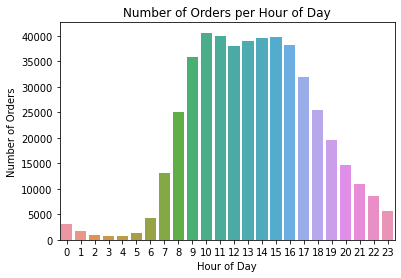

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df_instacart_orders, x='order_hour_of_day')
plt.title('Number of Orders per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

- It looks like the busy hours go from mid morning and start dropping around 5pm.
- df_instacart_orders is the data frame and we are looking at hour of the day.

### [A3] What day of the week do people shop for groceries?

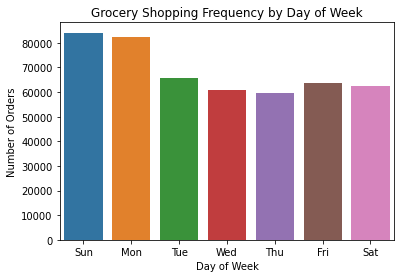

In [56]:
#this shows the frequency in which people grocery shop on what days; by looking at the graph, you know that it is sunday
sns.countplot(data=df_instacart_orders, x='order_dow')
plt.title('Grocery Shopping Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
plt.show()

### [A4] How long do people wait until placing another order?

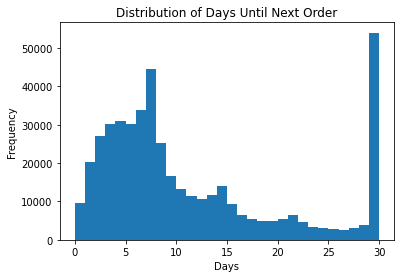

In [57]:
#this gives us 30 days worth of data and how long in between each order is placed
df_instacart_orders['days_since_prior_order'].plot.hist(bins=30)
plt.title('Distribution of Days Until Next Order')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

# Conclusion
I plotted different charts for what was asked and my conclusions are below:
1. People grocery shop at all times of the day, but you can see that high volumes are anywhere between 9-5.
2. Sunday is the day most people get their grocery shopping done with Monday come in at a close second. 
3. It looks like a lot of people will place another order somewhere in between 5 to 10 days. Most people do it every 30 days. 

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

I needed to plot a histogram on order distributions on two separate days

In [58]:
wednesday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 3]
saturday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 6]


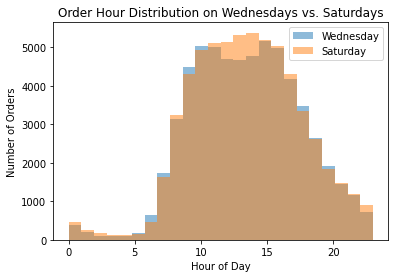

In [59]:
plt.hist(wednesday_orders['order_hour_of_day'], alpha=0.5, label='Wednesday', bins=24) #like this?
plt.hist(saturday_orders['order_hour_of_day'], alpha=0.5, label='Saturday', bins=24) #like this?
plt.title('Order Hour Distribution on Wednesdays vs. Saturdays')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

### [B2] What's the distribution for the number of orders per customer?

In [60]:
#value_counts() method counts the number of orders per user_id

In [61]:
orders_per_customer = df_instacart_orders['user_id'].value_counts()

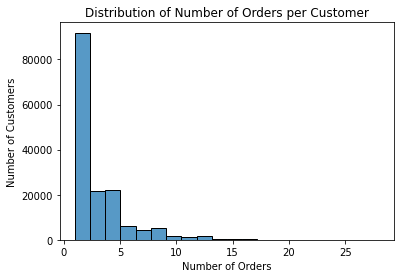

In [62]:
sns.histplot(orders_per_customer, bins=20)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

### [B3] What are the top 20 popular products (display their id and name)?

In [63]:
df_merged = pd.merge(df_order_products, 
                     df_products, 
                     on='product_id', 
                     how='left')

In [64]:
order_counts = df_merged.groupby(['product_id', 'product_name']).size().reset_index(name='order_counts')

In [65]:
top_ordered = order_counts.sort_values('order_counts', ascending=False).head(20)

In [66]:
display(top_ordered[['product_id', 'product_name', 'order_counts']])

,product_id,product_name,order_counts
22808,24852,Banana,66050
12025,13176,Bag of Organic Bananas,53297
19370,21137,Organic Strawberries,37039
20077,21903,Organic Baby Spinach,33971
43271,47209,Organic Hass Avocado,29773
43788,47766,Organic Avocado,24689
43663,47626,Large Lemon,21495
15364,16797,Strawberries,20018
24047,26209,Limes,19690
25556,27845,Organic Whole Milk,19600


# Conclusion
1. The 'order_hour_of_day' distributions look to be about the same for both Wednesday and Saturday, except Saturday is a little bit higher. It looks to gradually increase for both days around the hours of 5 and 10 and declines around 3pm.
2. Most people that order from Instacart place under 5 orders.
3. The top 3 most popular products are regular bananas, bag of organic bananas, and organic strawberries.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [67]:
#this counts the number of items in each order
items_per_order = df_order_products['order_id'].value_counts()

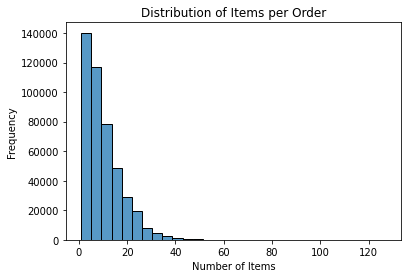

In [68]:
sns.histplot(items_per_order, bins=30)
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

It looks like a lot of people buy 20 items or less for each order, but some can buy up to almost 60 items. A lot of people buy 4-5 items, if I'm looking at the chart and doing my math correctly.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [69]:
#finding the reordered products
top_reorders = df_order_products[df_order_products['reordered'] == 1].groupby('product_id').size().reset_index(name='reordered_20')

In [70]:

df_order_products[df_order_products['reordered'] == 1].groupby('product_id').size()
top_reordered_products = top_reorders.sort_values(by= 'reordered_20', ascending=False).head(20)

In [71]:
print(top_reorders)

       product_id  reordered_20
0               1           158
1               3            31
2               4            25
3               7             1
4               8             6
...           ...           ...
36223       49690             4
36224       49691            31
36225       49692             5
36226       49693            11
36227       49694             3

[36228 rows x 2 columns]


In [72]:
#getting the names of the products
top_reorder_names = df_products[df_products['product_id'].isin(top_reordered_products['product_id'].unique())]

In [73]:
display(top_reorder_names[['product_id', 'product_name']].set_index('product_id'))

,product_name
product_id,
5876,Organic Lemon
8277,Apple Honeycrisp Organic
13176,Bag of Organic Bananas
16797,Strawberries
21137,Organic Strawberries
21903,Organic Baby Spinach
22935,Organic Yellow Onion
24852,Banana
24964,Organic Garlic


The top 20 items include only food items.

### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

# Conclusion
In this project I worked with the shopping habits from Instacart shoppers back in 2017. I cleaned all data that was required and looked into the trends of the shoppers. While shoppers made orders everyday, the highest volume days for orders were Sunday, Monday, and Tuesday. Most people did a new order every 5-10 days, and some even waited for 30 days to go by before placing another order. After looking through the data, I saw that the list of top 20 ordered items were mainly food. In the top 20 reordered list, there were self care products along with baby items and food people loved. I would conclude that Instacart revolutionized the grocery industry and for the better. 